In [1]:
import pickle
import blosc
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt
data = genfromtxt('idyom.txt', delimiter=',')

len(data[1])

85

In [2]:
columns = ["dataset_id","melody_id","note_id","melody_name","distance",
           "canseekey","canseedoor","agentbehindleft","agentbehindright","agentinfrontright",
           "agentinfrontleft","agentleft","agentright","agentbehind","agentinfront",
           "doorquad","keyquad","agentquad","agenty","agentx",
           "orientation","action","vertint12"",""articulation","comma",
           "voice","ornament","dyn","phrase","bioi",
           "deltast","accidental","mpitch","cpitch","barlength",
           "pulses","tempo","mode","keysig","dur",
           "onset",
           "action_order_ltm_action-distance","action_order_ltm_action-agentinfrontleft",
           "action_order_ltm_action-agentright","action_order_ltm_action-agentleft",
           "action_order_ltm_action-agentinfrontright","action_order_ltm_action-canseedoor",
           "action_order_ltm_action-agentinfront","action_order_stm_action-distance",
           "action_order_stm_action-agentinfrontleft","action_order_stm_action-agentright",
           "action_order_stm_action-agentleft","action_order_stm_action-agentinfrontright",
           "action_order_stm_action-canseedoor","action_order_stm_action-agentinfront",
           "action_weight_ltm","action_weight_stm","action_weight_ltm_action-distance",
           "action_weight_ltm_action-agentinfrontleft","action_weight_ltm_action-agentright",
           "action_weight_ltm_action-agentleft","action_weight_ltm_action-agentinfrontright",
           "action_weight_ltm_action-canseedoor","action_weight_ltm_action-agentinfront",
           "action_weight_stm_action-distance","action_weight_stm_action-agentinfrontleft",
           "action_weight_stm_action-agentright","action_weight_stm_action-agentleft",
           "action_weight_stm_action-agentinfrontright","action_weight_stm_action-canseedoor",
           "action_weight_stm_action-agentinfront","action_probability",
           "action_information_content","action_entropy","action_0",
           "action_1","action_2","action_3","action_4","action_5",
           "probability","information_content","entropy","information_gain"]


def get_mission(mission_id):
    return data[data[:,1] == mission_id+1]

missions = np.array([get_mission(i) for i in np.arange(1000)])

def calc_ics(d):
    return d[:,82]

ics = np.array([calc_ics(m) for m in missions])

def calc_entropies(d):
    return d[:,83]

entropies = np.array([calc_entropies(m) for m in missions])
entropy_diff = np.array([np.diff(es) for es in entropies])
max_entropy_diff = np.array([np.argmax(eds[1:-1])+2 for eds in entropy_diff])

eics = np.array([e/ic for (e,ic) in zip(entropies,ics)])
max_eics = np.array([np.argmax(eic[1:-1])+1 for eic in eics])

def get_actions(d):
    return np.array([int(d[i,21]) for i in np.arange(len(d))])

actions = np.array([get_actions(m) for m in missions])

def find_pickups(acns):
    return np.where(acns == 4)

pickups = np.array([find_pickups(acns)[0][0] for acns in actions])    

In [3]:
def entropy_plot(id):
    e = entropies[id]
    acns = actions[id]
    pu = pickups[id]
    me = max_entropy_diff[id]
    
    plt.plot(e)
    plt.scatter([pu],[e[pu]],marker='X',color='r')
    plt.scatter([me],[e[me]],marker='x',color='b')
    ax = plt.gca()
    ax.set_xticks(np.arange(len(acns)))
    ax.set_xticklabels(acns)
    plt.xlabel('action')
    plt.ylabel('entropy')
    
def eic_plot(id):
    ic = ics[id]
    e = entropies[id]
    acns = actions[id]
    pu = pickups[id]
    eic = e / ic
    meic = max_eics[id]

    
    plt.plot(eic)
    plt.scatter([pu],[eic[pu]],marker='X',color='r')
    plt.scatter([meic],[eic[meic]],marker='x',color='b')
    ax = plt.gca()
    ax.set_xticks(np.arange(len(acns)))
    ax.set_xticklabels(acns)
    plt.xlabel('action')
    plt.ylabel('e/ic')

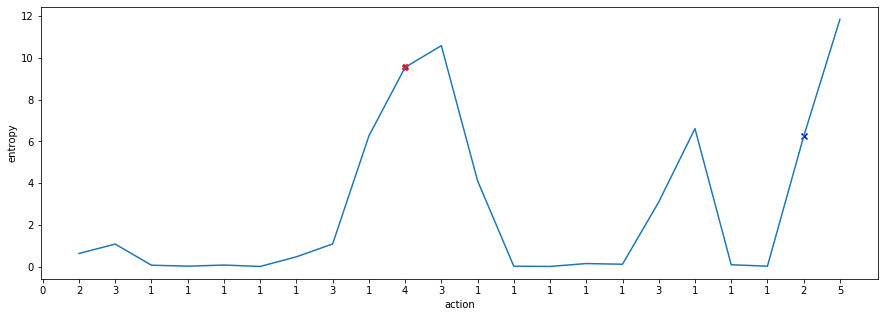

In [4]:
mission_id = 0
plt.figure(figsize=(15,5))
entropy_plot(mission_id)

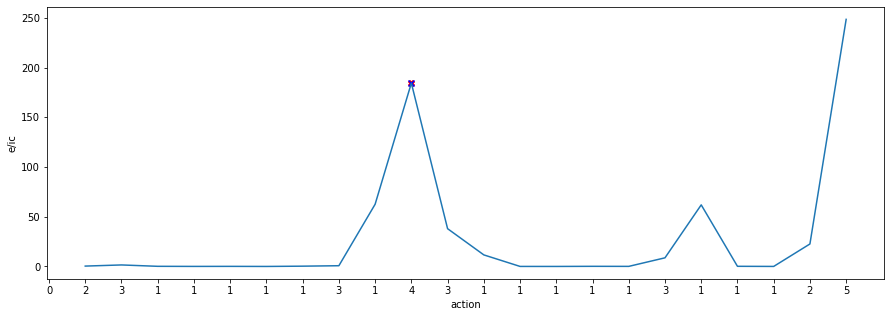

In [5]:
plt.figure(figsize=(15,5))
eic_plot(mission_id)

In [6]:
len(np.where([x==y for (x,y) in zip(pickups,max_entropy_diff)])[0])

650

In [7]:
len(np.where([x==y for (x,y) in zip(pickups,max_eics)])[0])

752